# Mini Project - Conduct an Exploratory Data Analysis (EDA)  

## Import the libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset creation

In [29]:
# Generate synthetic dataset
np.random.seed(42)

# Define the number of samples
num_samples = 1000

# Create numerical columns with some outliers
data = pd.DataFrame({
    'Numerical_Column1': np.random.normal(50, 10, num_samples).tolist() + [500, 600, 700],
    'Numerical_Column2': np.random.normal(30, 5, num_samples).tolist() + [300, 400, 500],
    'Categorical_Column': np.random.choice(['Category_A', 'Category_B', 'Category_C'], num_samples + 3)
})

# Introduce missing values
data.loc[np.random.choice(data.index, size=50, replace=False), 'Numerical_Column1'] = np.nan
data.loc[np.random.choice(data.index, size=30, replace=False), 'Numerical_Column2'] = np.nan

# Save to CSV
data.to_csv('dataset.csv', index=False)

# Load the dataset
data = pd.read_csv('dataset.csv')

In [30]:
# Dataset Overview
num_rows, num_columns = data.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

# Data Summary
print('Data Types and Basic Statistics:')
print(data.info())
print(data.describe())

Number of rows: 1003
Number of columns: 3
Data Types and Basic Statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Numerical_Column1   953 non-null    float64
 1   Numerical_Column2   973 non-null    float64
 2   Categorical_Column  1003 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.6+ KB
None
       Numerical_Column1  Numerical_Column2
count         953.000000         973.000000
mean           51.373935          31.495065
std            29.257591          21.586672
min            17.587327          15.298057
25%            43.473760          26.971922
50%            50.184184          30.334954
75%            56.487099          33.694052
max           700.000000         500.000000


In [31]:
# Identify Missing Values
missing_values = data.isnull().sum()
print('Missing Values:')
print(missing_values[missing_values > 0])

Missing Values:
Numerical_Column1    50
Numerical_Column2    30
dtype: int64


## Univariate Analysis

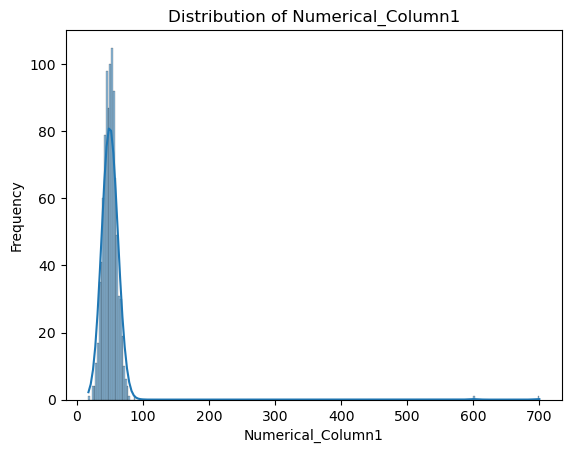

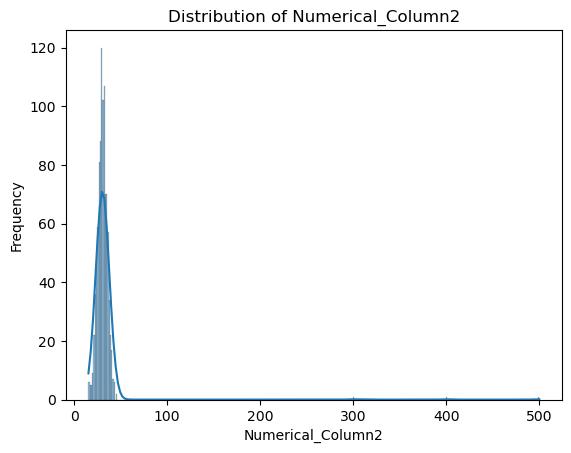

In [33]:
# Histograms for numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_columns:
    plt.figure()
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

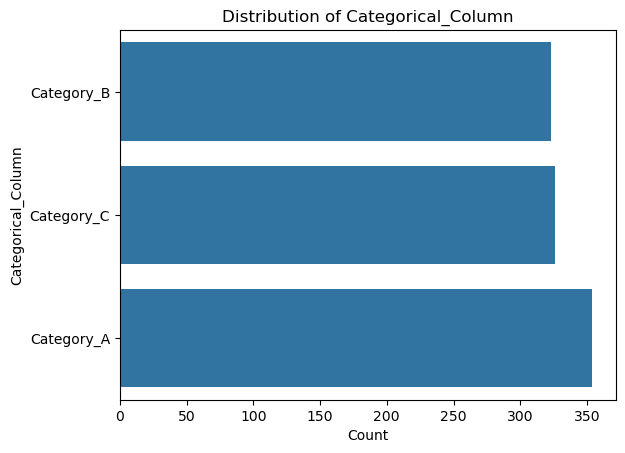

In [34]:
# Bar charts for categorical columns
categorical_columns = data.select_dtypes(include=[object]).columns.tolist()
for col in categorical_columns:
    plt.figure()
    sns.countplot(y=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

## Bivariate Analysis

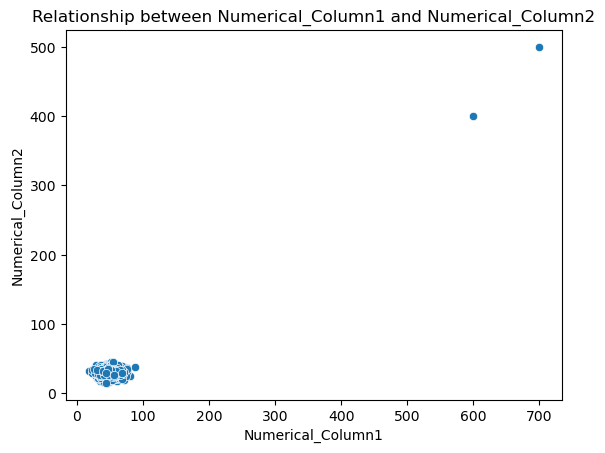

Correlation between Numerical_Column1 and Numerical_Column2: 0.909650433439108


In [36]:
# Scatter plot and correlation coefficient
if len(numerical_columns) >= 2:
    plt.figure()
    sns.scatterplot(x=numerical_columns[0], y=numerical_columns[1], data=data)
    plt.title(f'Relationship between {numerical_columns[0]} and {numerical_columns[1]}')
    plt.xlabel(numerical_columns[0])
    plt.ylabel(numerical_columns[1])
    plt.show()
    correlation = data[numerical_columns[0]].corr(data[numerical_columns[1]])
    print(f'Correlation between {numerical_columns[0]} and {numerical_columns[1]}: {correlation}')

## Multivariate Analysis

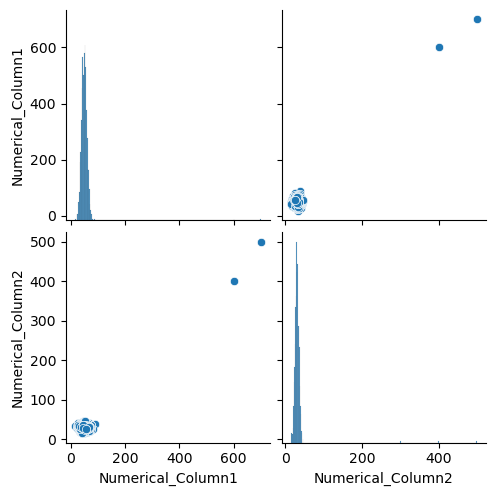

In [38]:
# Pairplot
sns.pairplot(data[numerical_columns])
plt.show()

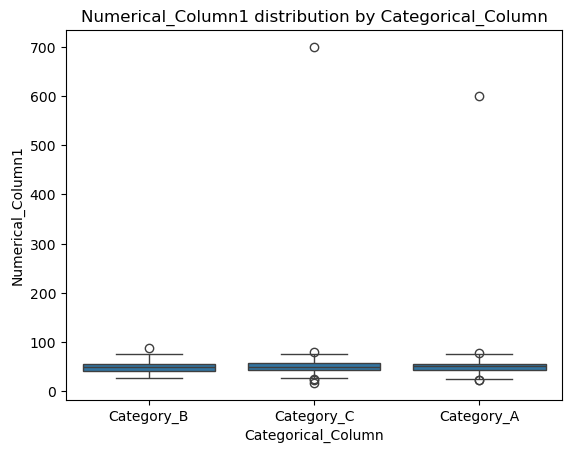

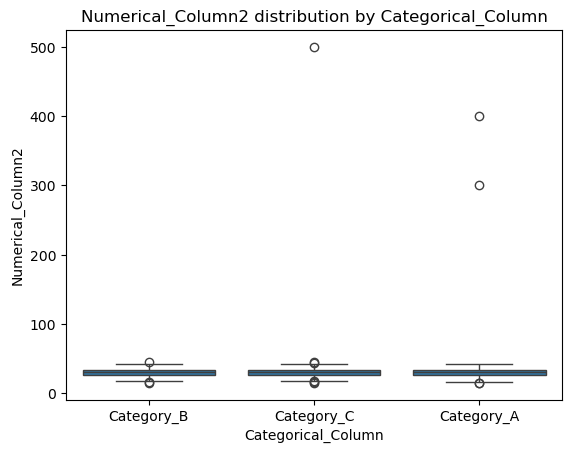

In [39]:
# Boxplot
for col in categorical_columns:
    for num_col in numerical_columns:
        plt.figure()
        sns.boxplot(x=col, y=num_col, data=data)
        plt.title(f'{num_col} distribution by {col}')
        plt.xlabel(col)
        plt.ylabel(num_col)
        plt.show()

## Handling Missing Values and Outliers

In [41]:
# Fill missing values with the mean for numerical columns
data_filled = data.copy()
for col in numerical_columns:
    data_filled[col] = data[col].fillna(data[col].mean())

# IQR method for outlier detection
Q1 = data_filled[numerical_columns].quantile(0.25)
Q3 = data_filled[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_filled[numerical_columns] < (Q1 - 1.5 * IQR)) | (data_filled[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
data_no_outliers = data_filled[~outliers]

## Insights and Conclusions

In [43]:
print('Key Insights:')
# Example insights
print(f'The dataset has {num_rows} rows and {num_columns} columns.')
print(f'The columns with missing values are: {missing_values[missing_values > 0].index.tolist()}')
print(f'The correlation between {numerical_columns[0]} and {numerical_columns[1]} is {correlation:.2f}')
print('Further analysis or data collection recommendations:')
print('- Investigate and handle missing values appropriately.')
print('- Analyze the distribution of key numerical and categorical columns.')
print('- Study relationships between different features.')

Key Insights:
The dataset has 1003 rows and 3 columns.
The columns with missing values are: ['Numerical_Column1', 'Numerical_Column2']
The correlation between Numerical_Column1 and Numerical_Column2 is 0.91
Further analysis or data collection recommendations:
- Investigate and handle missing values appropriately.
- Analyze the distribution of key numerical and categorical columns.
- Study relationships between different features.


## Save the report

In [45]:
with open('EDA_Report.txt', 'w') as f:
    f.write(f'Number of rows: {num_rows}\n')
    f.write(f'Number of columns: {num_columns}\n\n')
    f.write('Data Types and Basic Statistics:\n')
    f.write(f'{data.info()}\n\n')
    f.write(f'{data.describe()}\n\n')
    f.write('Missing Values:\n')
    f.write(f'{missing_values[missing_values > 0]}\n\n')
    f.write('Key Insights:\n')
    f.write(f'The dataset has {num_rows} rows and {num_columns} columns.\n')
    f.write(f'The columns with missing values are: {missing_values[missing_values > 0].index.tolist()}\n')
    f.write(f'The correlation between {numerical_columns[0]} and {numerical_columns[1]} is {correlation:.2f}\n')
    f.write('Further analysis or data collection recommendations:\n')
    f.write('- Investigate and handle missing values appropriately.\n')
    f.write('- Analyze the distribution of key numerical and categorical columns.\n')
    f.write('- Study relationships between different features.\n')

print('EDA complete. Report saved as EDA_Report.txt.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Numerical_Column1   953 non-null    float64
 1   Numerical_Column2   973 non-null    float64
 2   Categorical_Column  1003 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.6+ KB
EDA complete. Report saved as EDA_Report.txt.
